In [131]:
import numpy as np
import sys

import skimage.filters
import skimage.morphology
import cv2

import os
import matplotlib.pyplot as plt

np.set_printoptions(threshold=sys.maxsize)

In [132]:
def get_tissue_mask_hsv_cv2(thumbnail, white_threshold):
    # Convert BGR to HSV
    hsv = cv2.cvtColor(thumbnail, cv2.COLOR_BGR2HSV)
    H, S, V = cv2.split(hsv)
    # Plot the H, S, V channels
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(H, cmap='hsv')
    ax[0].set_title('Hue')

    ax[1].imshow(S, cmap='hsv')
    ax[1].set_title('Saturation')

    ax[2].imshow(V, cmap='hsv')
    ax[2].set_title('Value')

    # Filter out white pixels
    V_mask = V < white_threshold

    # Applying Otsu's threshold to saturation
    S_filtered = S[V_mask]
    if S_filtered.size > 0:  # Ensure there is at least one element to apply threshold
        S_threshold = skimage.filters.threshold_otsu(S_filtered)
        S_mask = S > S_threshold
    else:
        S_mask = np.zeros_like(S, dtype=bool)

    # Applying Otsu's threshold to hue
    H_filtered = H[V_mask]
    if H_filtered.size > 0:
        H_threshold = skimage.filters.threshold_otsu(H_filtered)
        H_mask = H > H_threshold
    else:
        H_mask = np.zeros_like(H, dtype=bool)

    # Plot the V and H and S masks
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(H_mask, cmap='gray')
    ax[0].set_title('Hue mask')

    ax[1].imshow(S_mask, cmap='gray')
    ax[1].set_title('Saturation mask')

    ax[2].imshow(V_mask, cmap='gray')
    ax[2].set_title('Value mask')

    # Combine masks
    mask = np.logical_and(np.logical_and(H_mask, S_mask), V_mask)
    mask = skimage.morphology.binary_dilation(mask)

    return mask

/tmp/ipykernel_48608/1340809098.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 3, figsize=(15, 5))


Amount of images checked:  13
Chosen image:  C2321120-1-A-PAS.svs__OP_10__ROI_96256_45056_4096_4096.jpeg
Is empty:  False


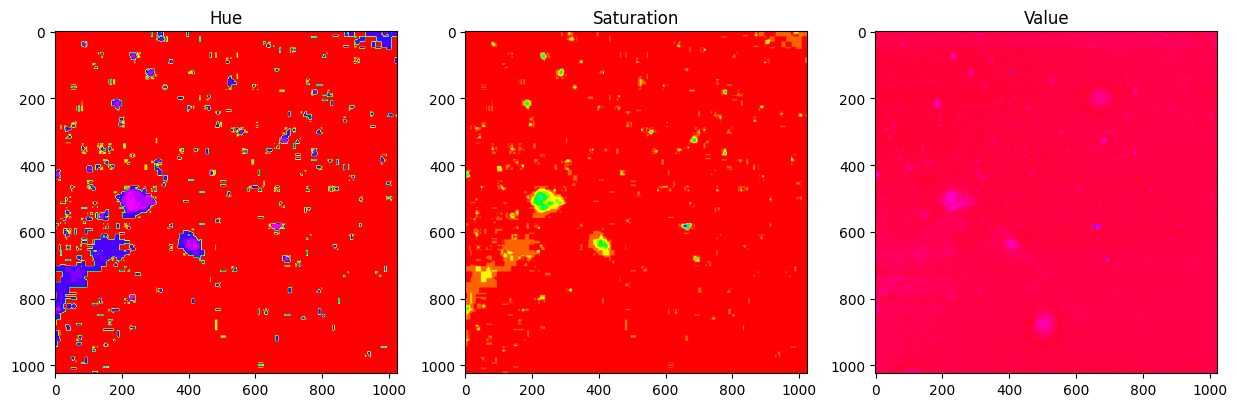

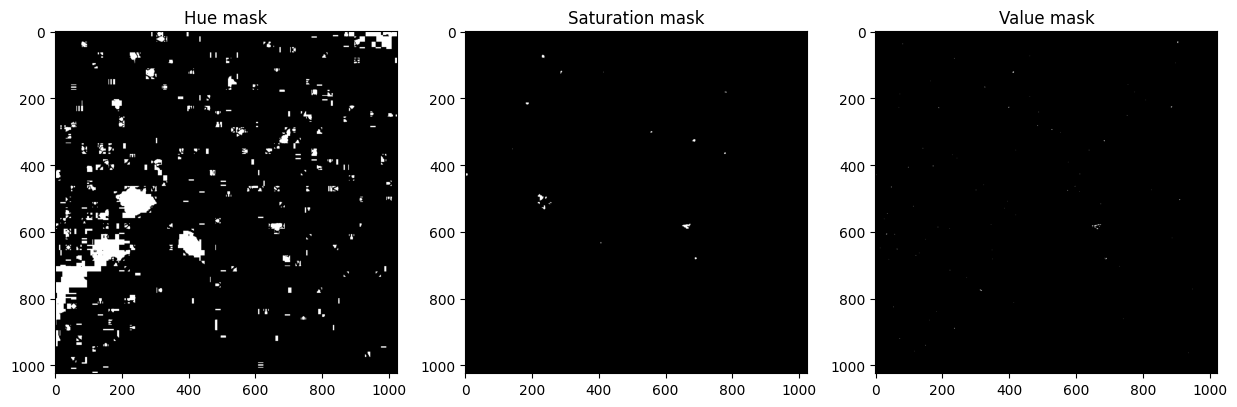

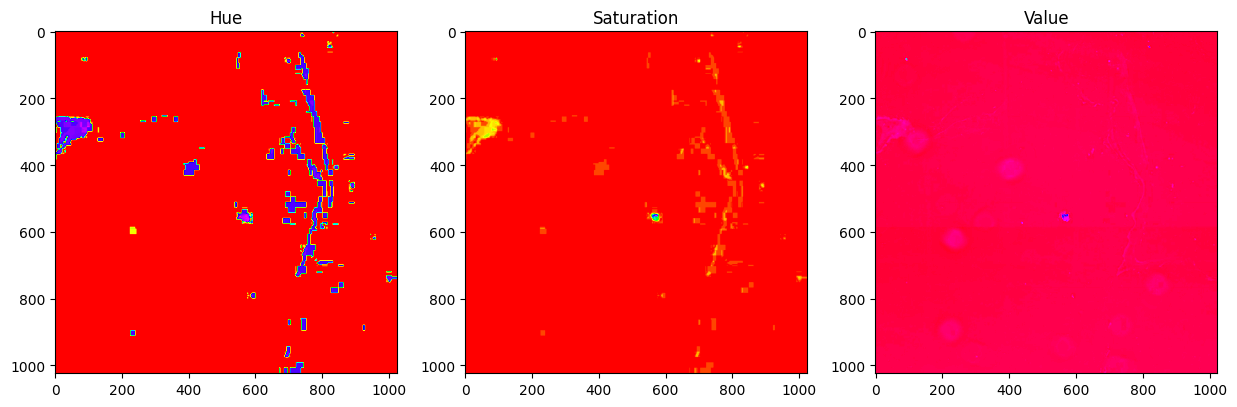

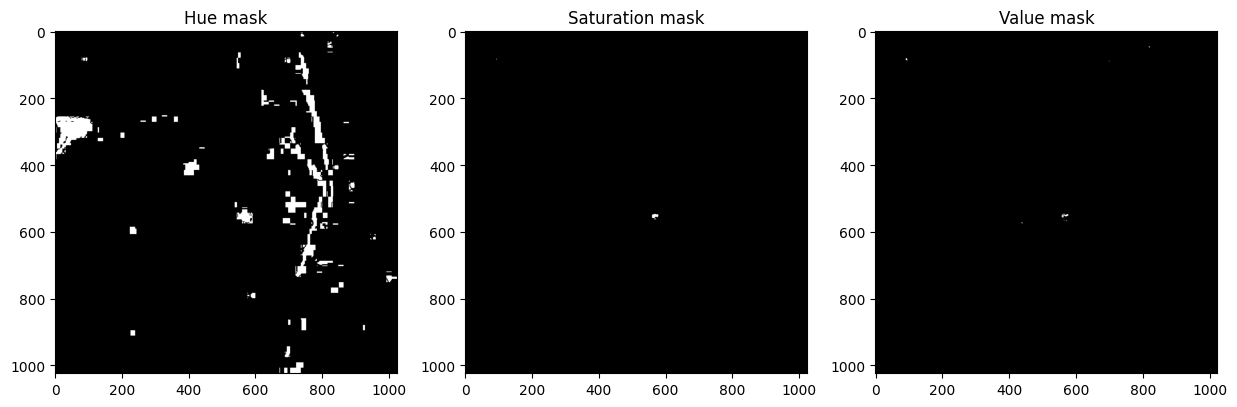

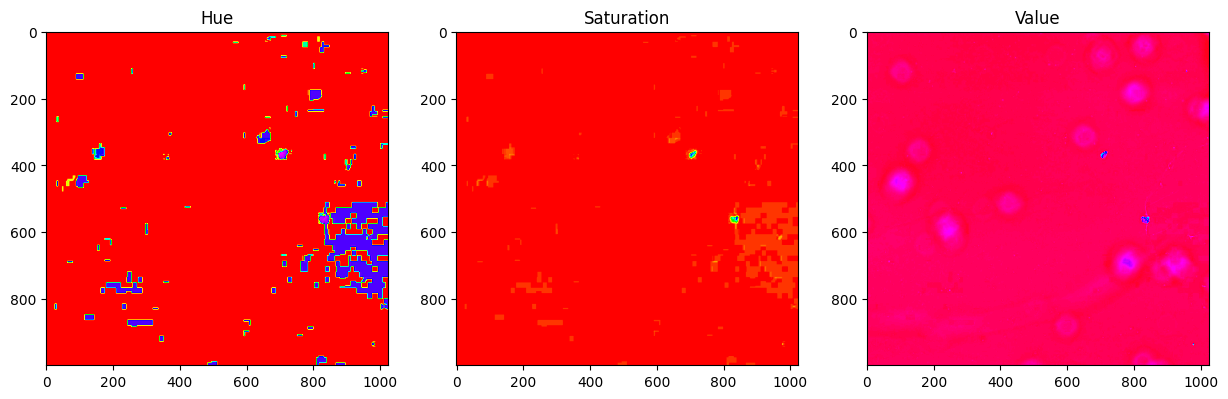

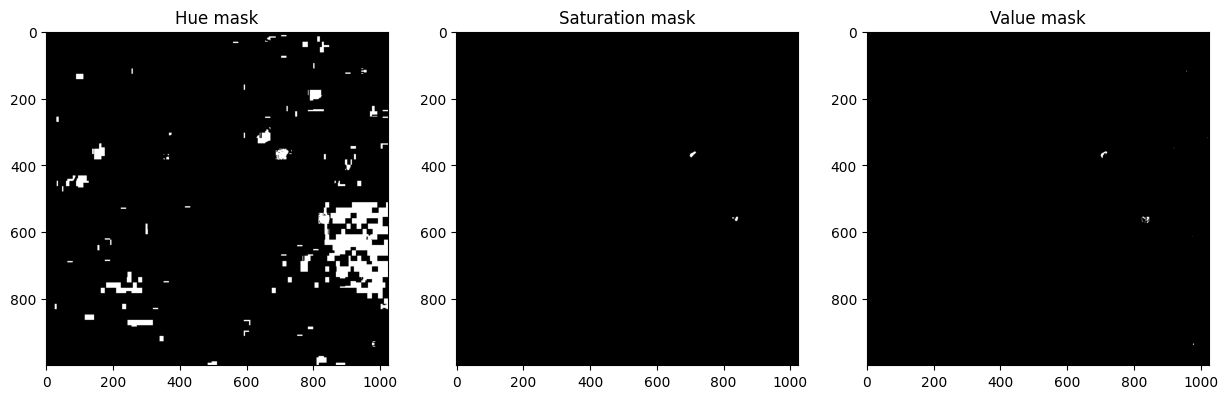

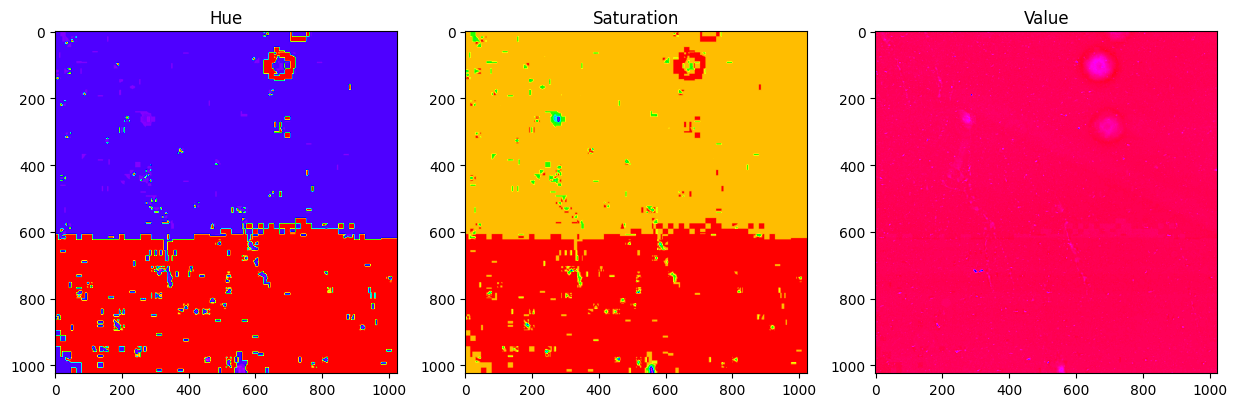

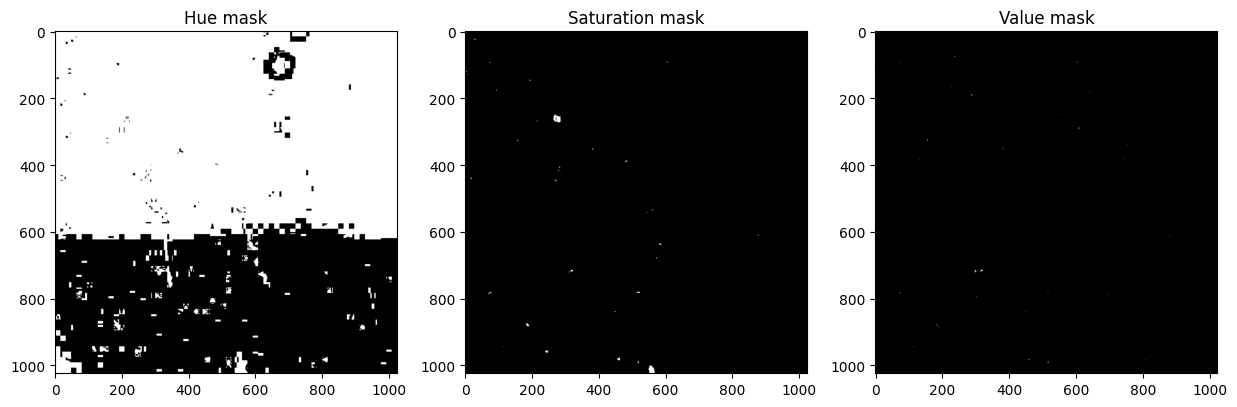

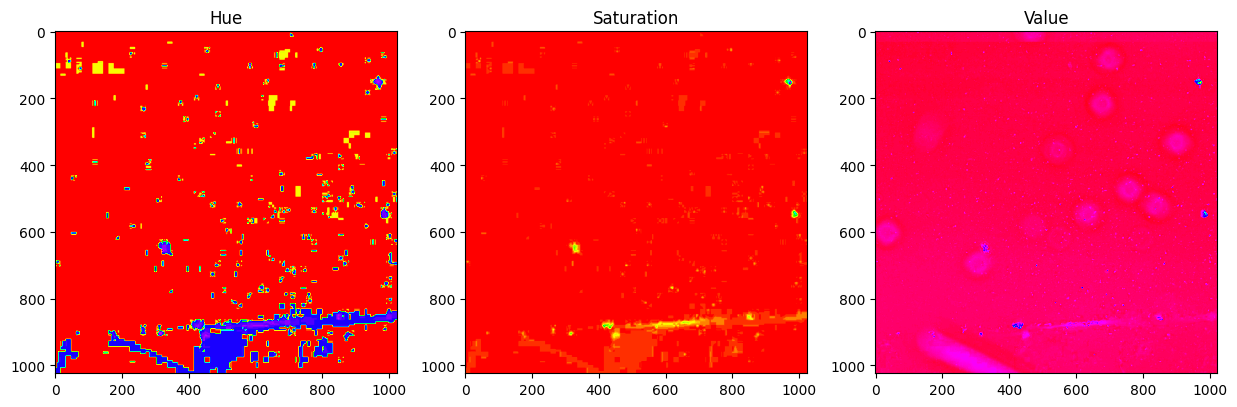

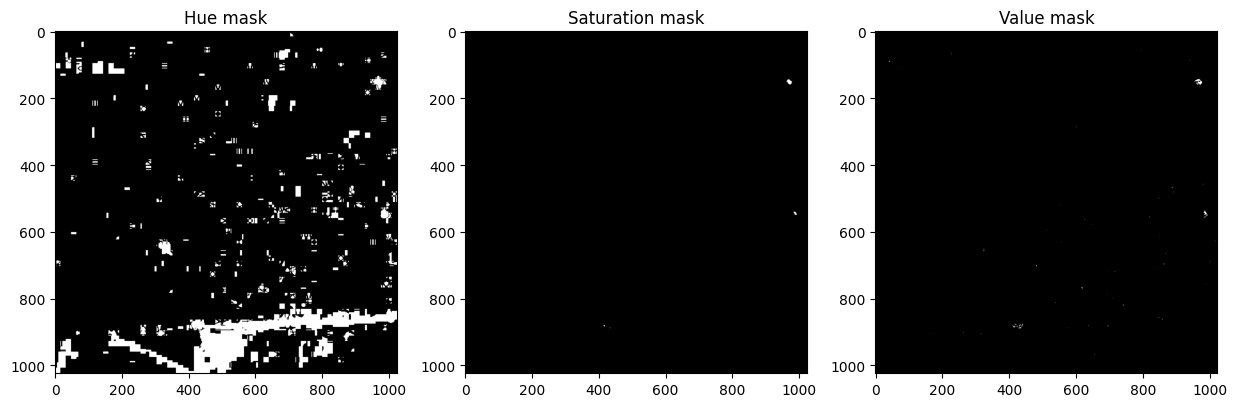

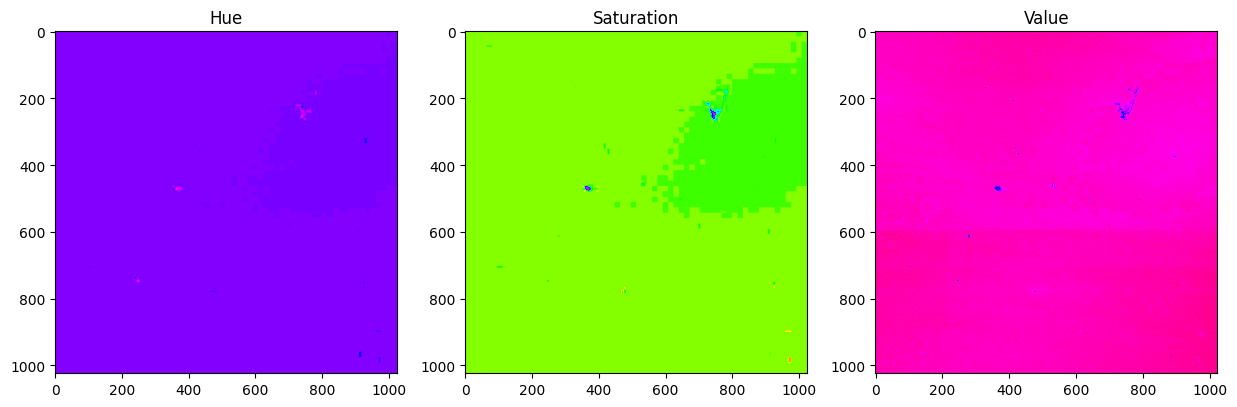

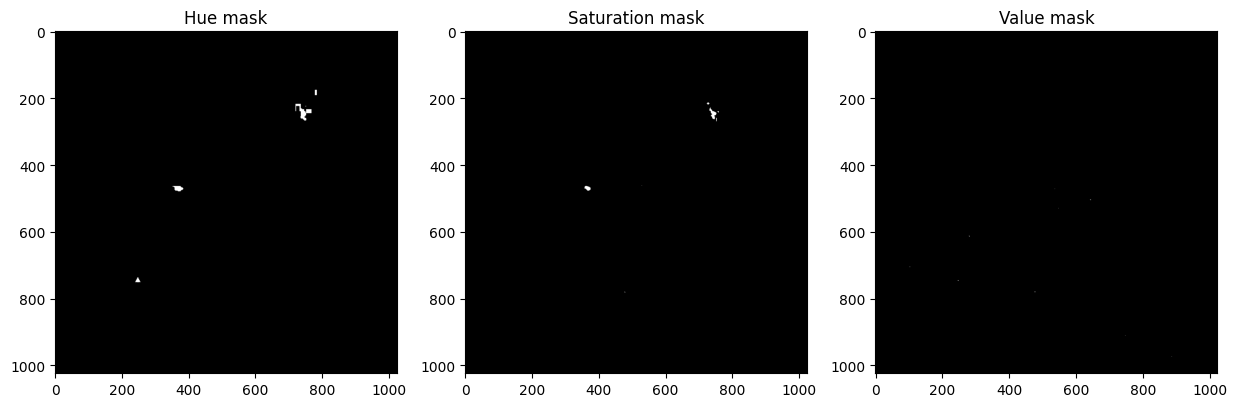

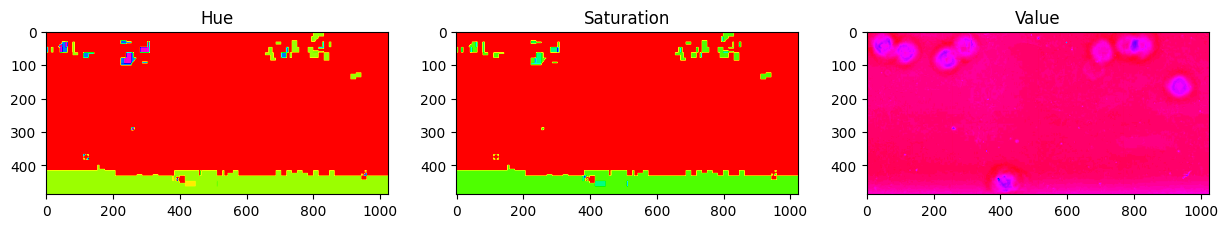

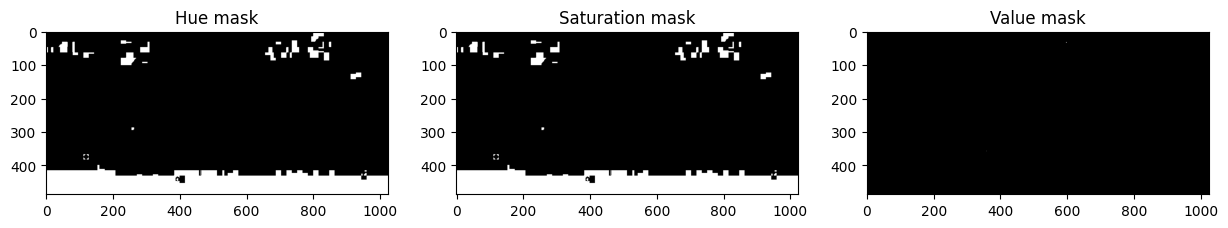

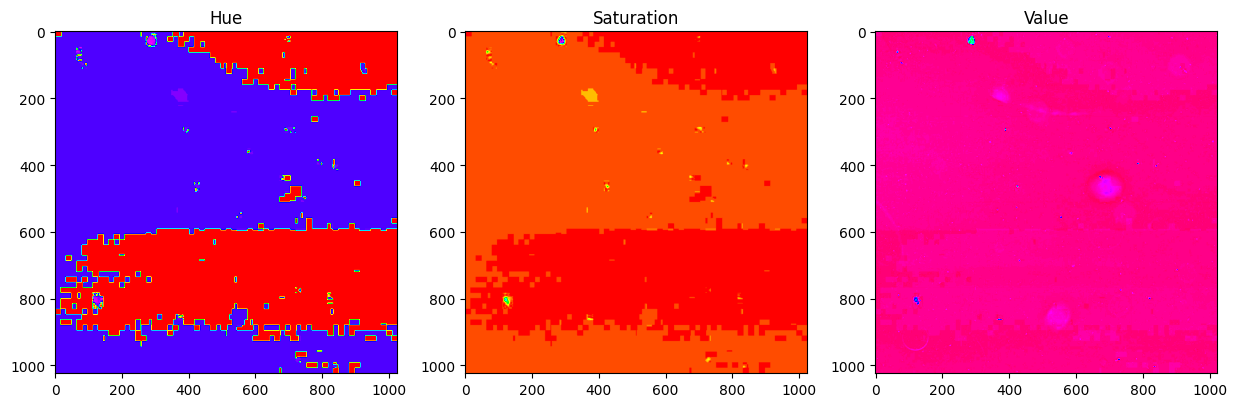

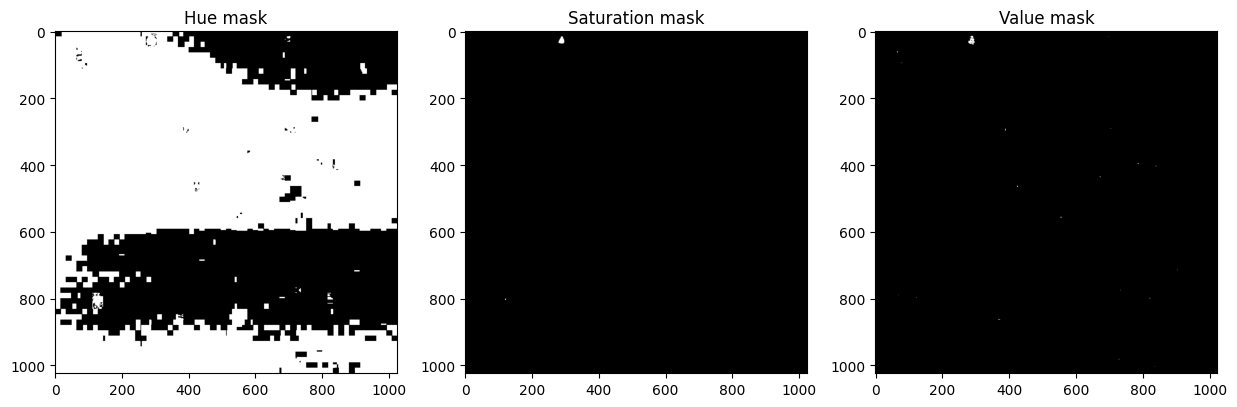

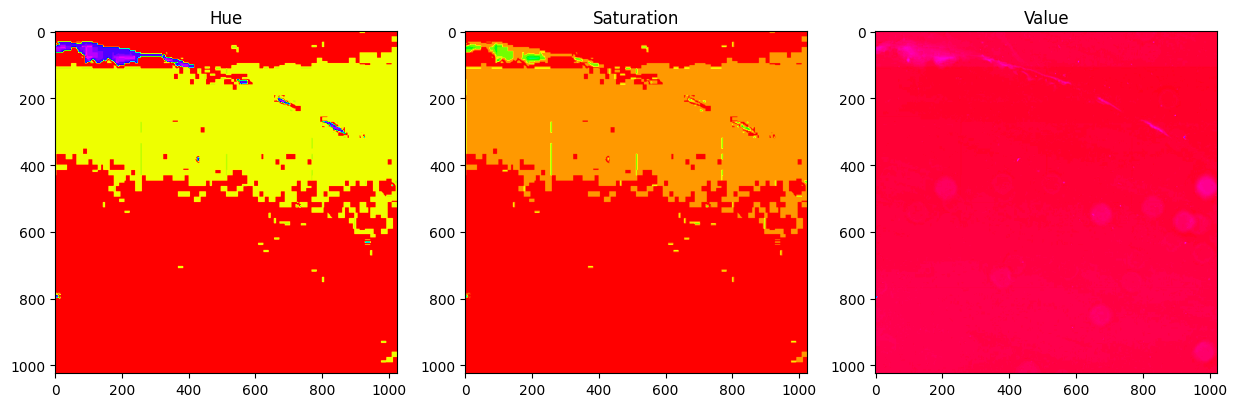

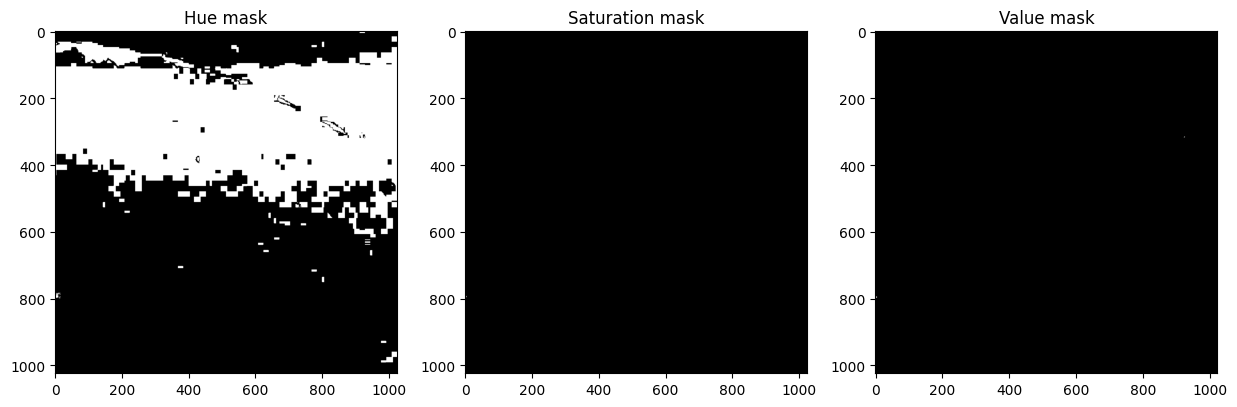

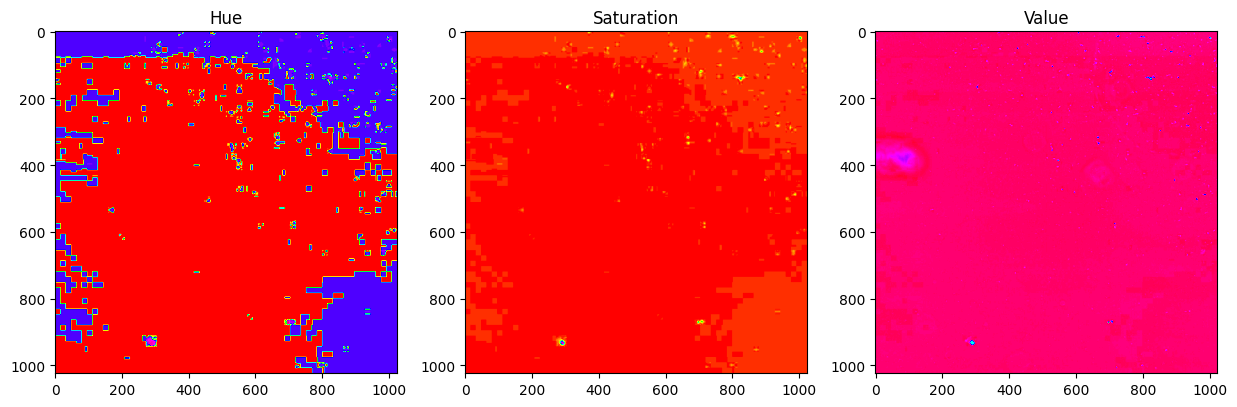

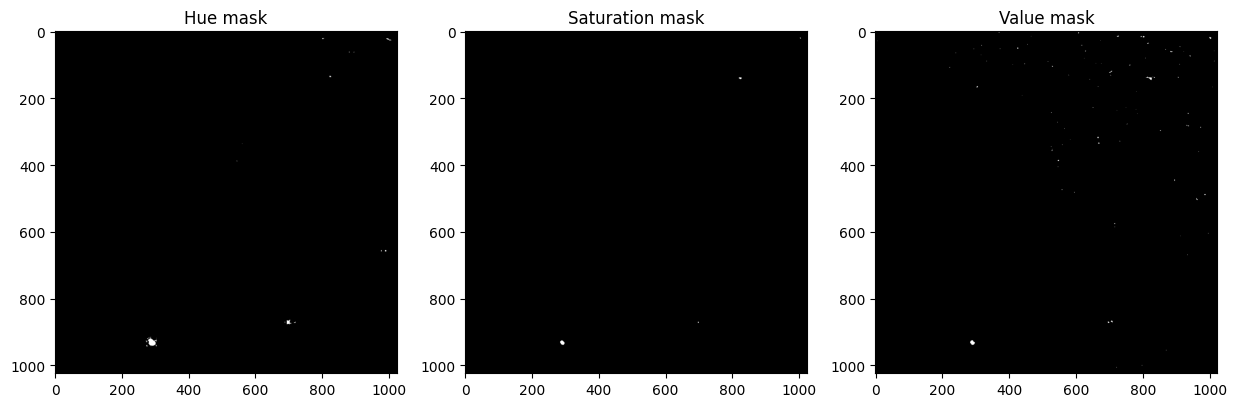

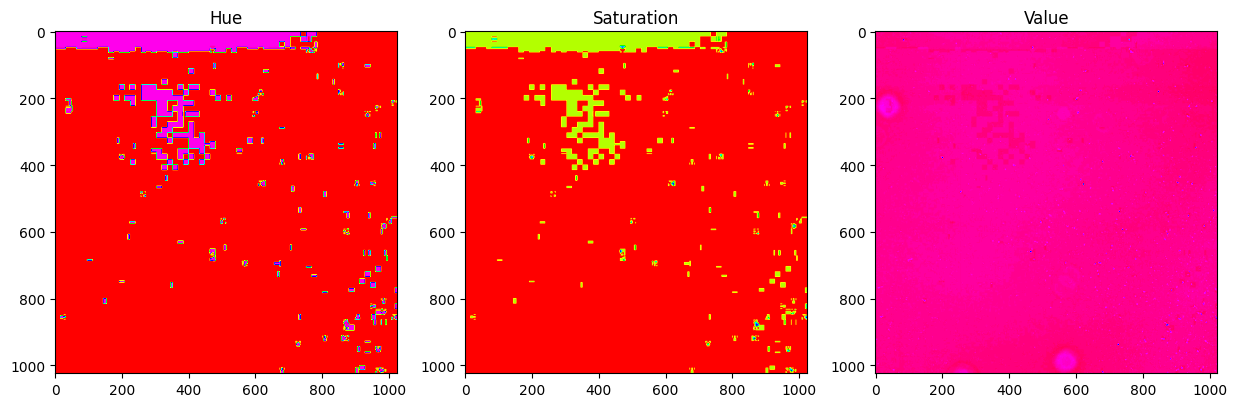

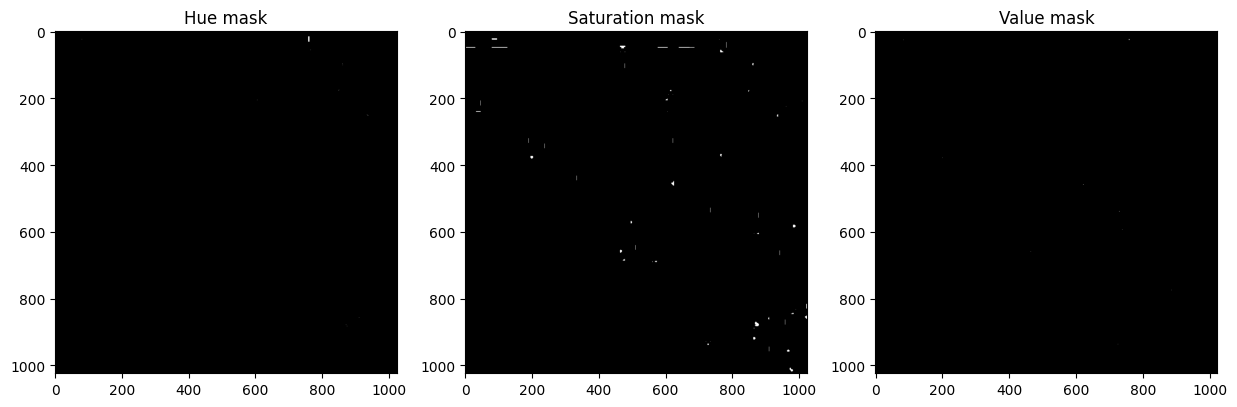

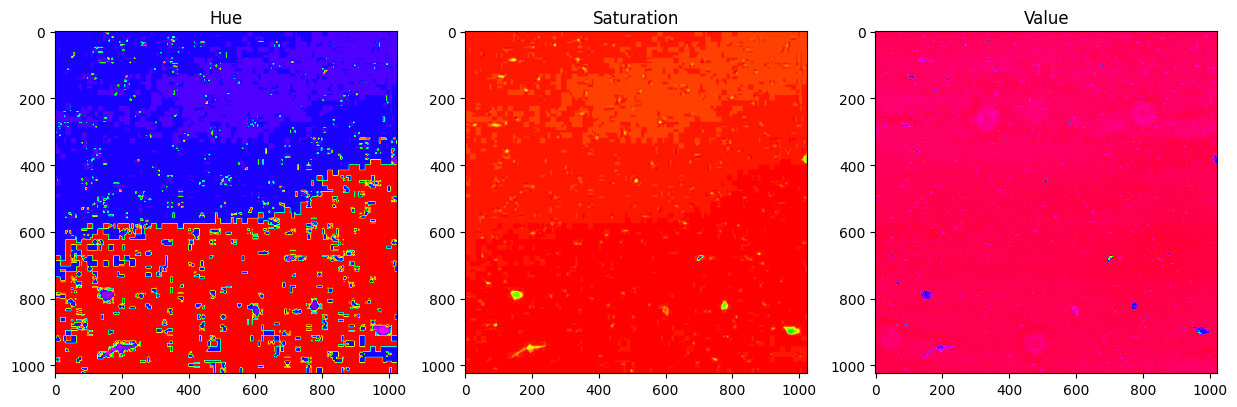

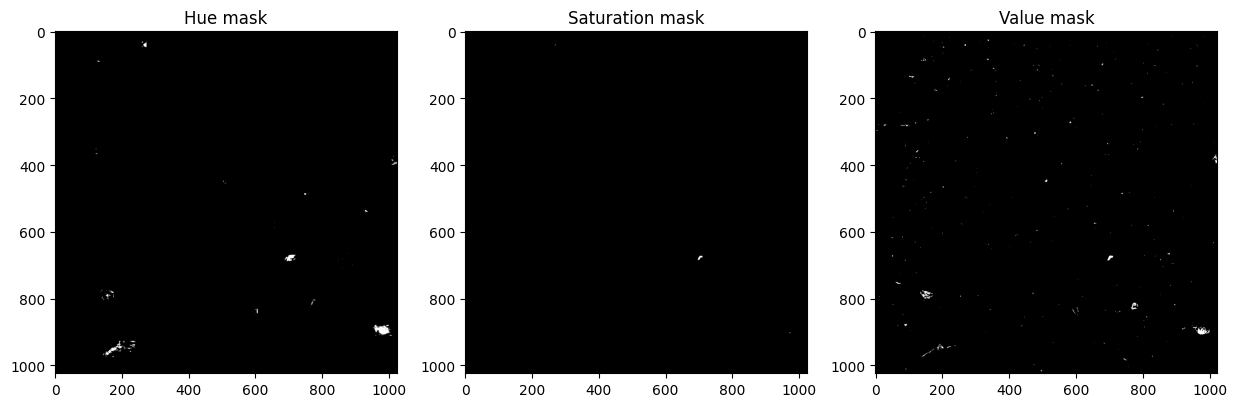

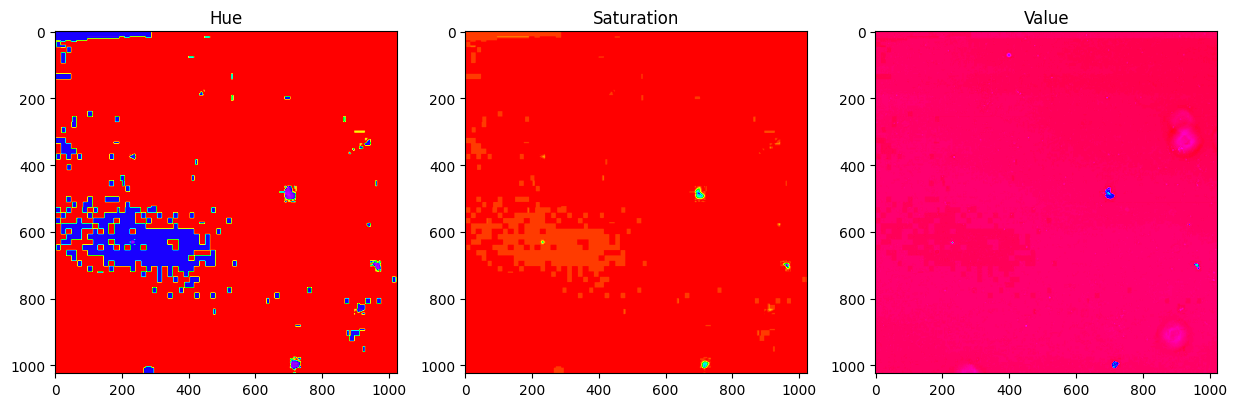

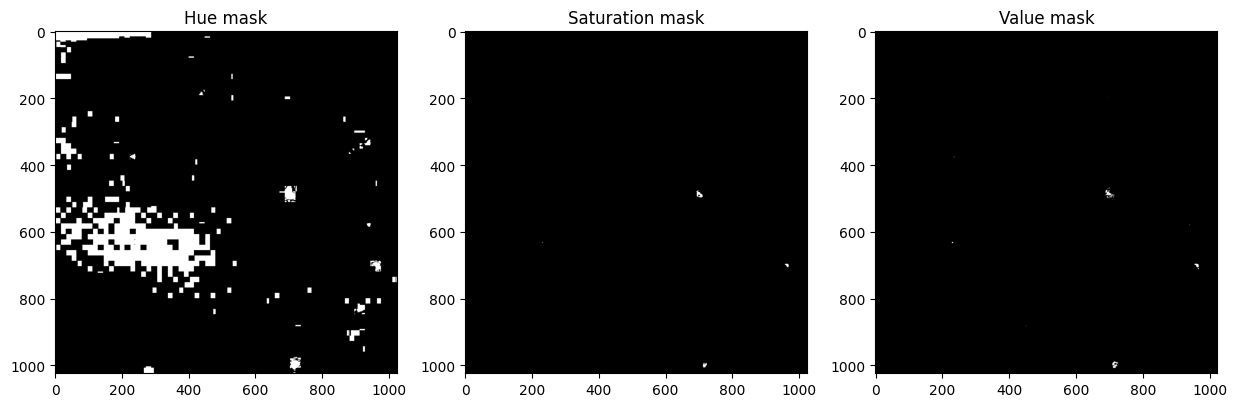

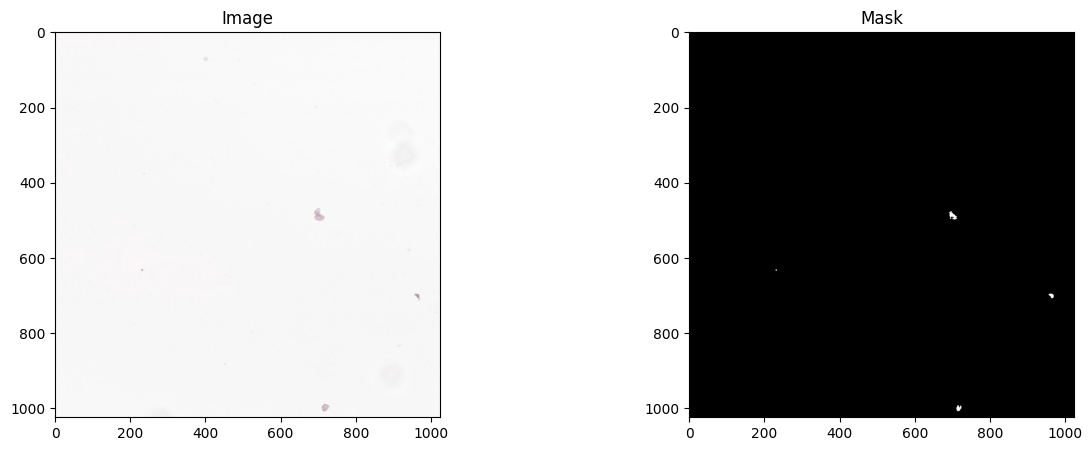

In [135]:
img_dir = "/home/wfd/Desktop/Projet_M1/Data/Export/Temp/tiler-output/Tiles/C2321120-1-A-PAS/"
img_paths = os.listdir(img_dir)
# Sort by name
img_paths.sort()

is_empty = True
count = 0
while is_empty == True:
    chosen_img = np.random.choice(img_paths)
    im = cv2.imread(img_dir + chosen_img)

    binary_mask = get_tissue_mask_hsv_cv2(im, 210)
    # Count the number of white pixels
    is_empty = np.sum(binary_mask) < 350
    count += 1

print("Amount of images checked: ", count)
print("Chosen image: ", chosen_img)
# Plot the image and the mask side by side
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(im)
ax[0].set_title('Image')
ax[1].imshow(binary_mask, cmap='gray')
ax[1].set_title('Mask')

print("Is empty: ", is_empty)